In [2]:
import pandas as pd
from datasets import load_dataset
from matplotlib import pyplot as plt
# Loading Dataset
datasets = load_dataset("lukebarousse/data_jobs")
df = datasets['train'].to_pandas()

# Cleaning Datasets
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

Making string to list

In [3]:
import ast
def str_to_list(string):
    if pd.notna(string):
        return ast.literal_eval(string)
df['job_skills'] = df['job_skills'].apply(str_to_list)

# Note: Before run explode() make sure the input is a list not a string ⚠
df_exp = df.explode("job_skills")
df_exp

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [7]:
df_exp['job_skills'].value_counts().sort_values(ascending=False)

job_skills
sql             384849
python          380909
aws             145381
azure           132527
r               130892
                 ...  
rubyon rails         1
visualbasic          1
msaccess             1
dingtalk             1
rocketchat           1
Name: count, Length: 252, dtype: int64

In [19]:
skills_count = df_exp.groupby(['job_title_short','job_skills']).size()
type(skills_count)

pandas.core.series.Series

In [40]:
# now skills_count is a series to turn it to dataframe we should rest the index
# chaning 0 title to skill_count
df_skills_count = skills_count.reset_index(name='skill_count')

# sorting values by skill_count order
df_skills_count = df_skills_count.sort_values(by='skill_count',  ascending=False)
df_skills_count

# Now we want only Data Analyst
job_chosen = "Data Analyst"
top =10

df_final = df_skills_count[df_skills_count['job_title_short'] == job_chosen].head(top)
df_final

,job_title_short,job_skills,skill_count
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


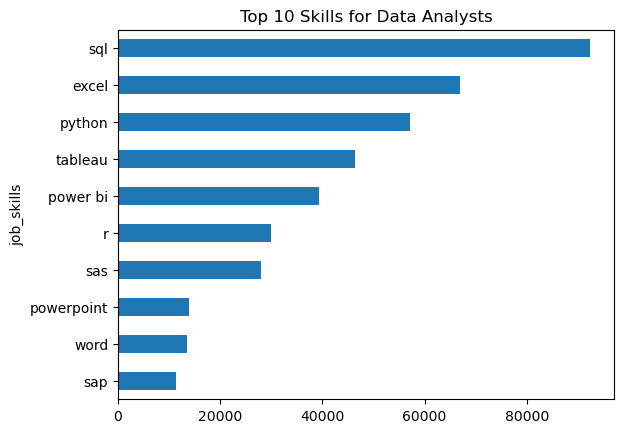

In [42]:
# chose the x and y is important in this situation cuz by default it will select the first column as x 
df_final.plot(kind='barh', x='job_skills', y='skill_count' )
# to swtich the down to up 
plt.gca().invert_yaxis()
plt.title(f'Top {top} Skills for {job_chosen}s')
# removing legend
plt.legend().set_visible(False)